# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

**1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.**

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
renda = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
# drop de colunas desnecessárias
renda.drop(['Unnamed: 0', 'index', 'mau'], axis=1, inplace=True)
renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [4]:
# separando as colunas numéricas
renda_numerico = renda[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
renda_numerico.head(3)

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98


C:\Users\ricme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


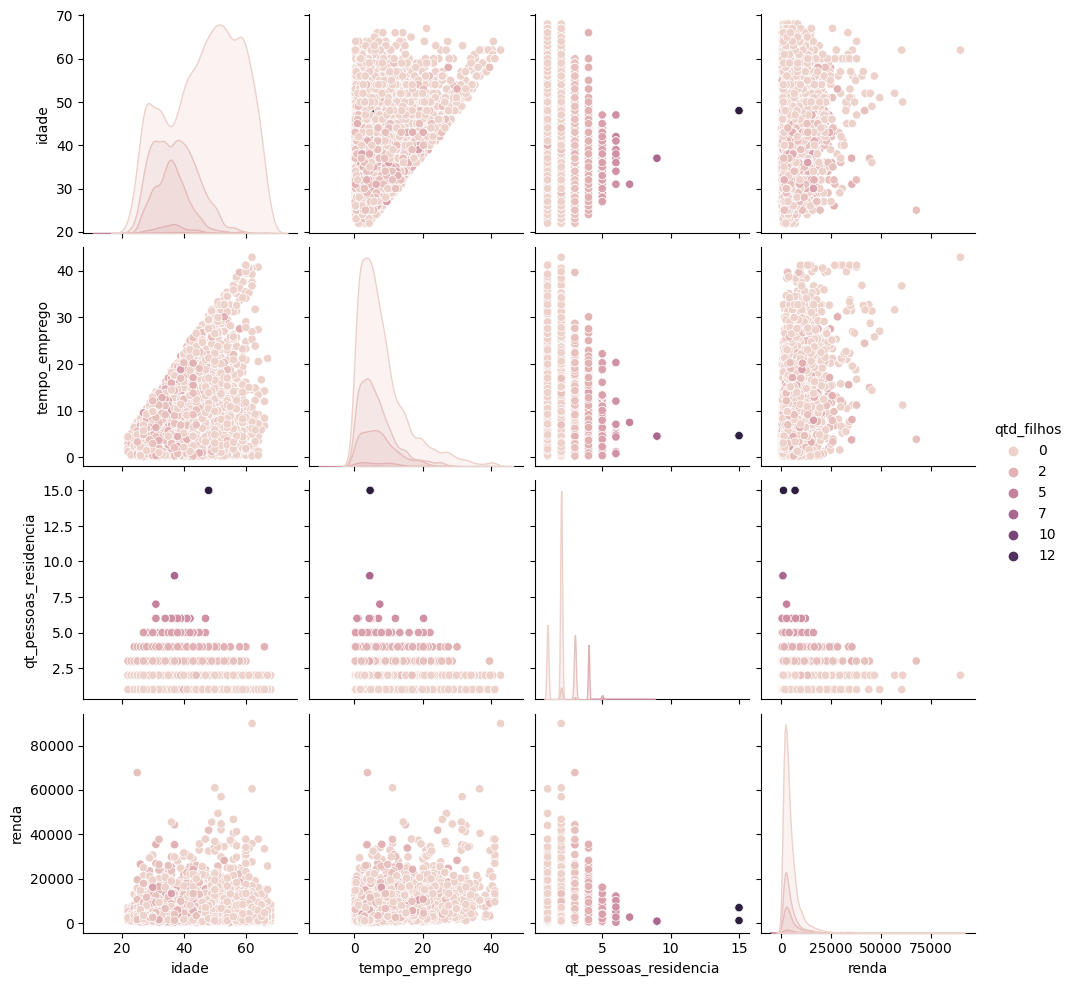

In [5]:
# Criando um gráfico de matriz de dispersão
sns.pairplot(renda_numerico, hue='qtd_filhos')
plt.show()

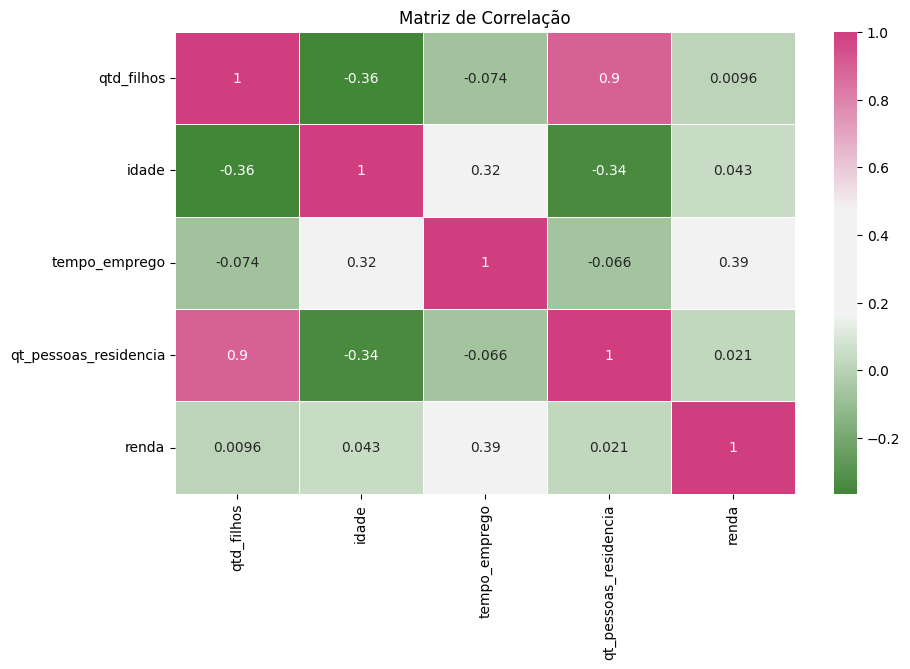

In [6]:
# calculando a correlação
renda_corr = renda_numerico.corr()

# Criando um mapa de calor para visualizar a matriz de correlação
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
plt.figure(figsize=(10, 6))
sns.heatmap(renda_corr, annot=True, cmap=cmap, linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

- A variável qt_pessoas_residencia está altamente correlacionada de forma positiva com a variável qtd_filhos. O que faz todo o sentindo.
- A quantidade de filhos praticamente não influencia na renda.
- A renda é influenciada positivamente pelo tempo de empregro.

**2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.**

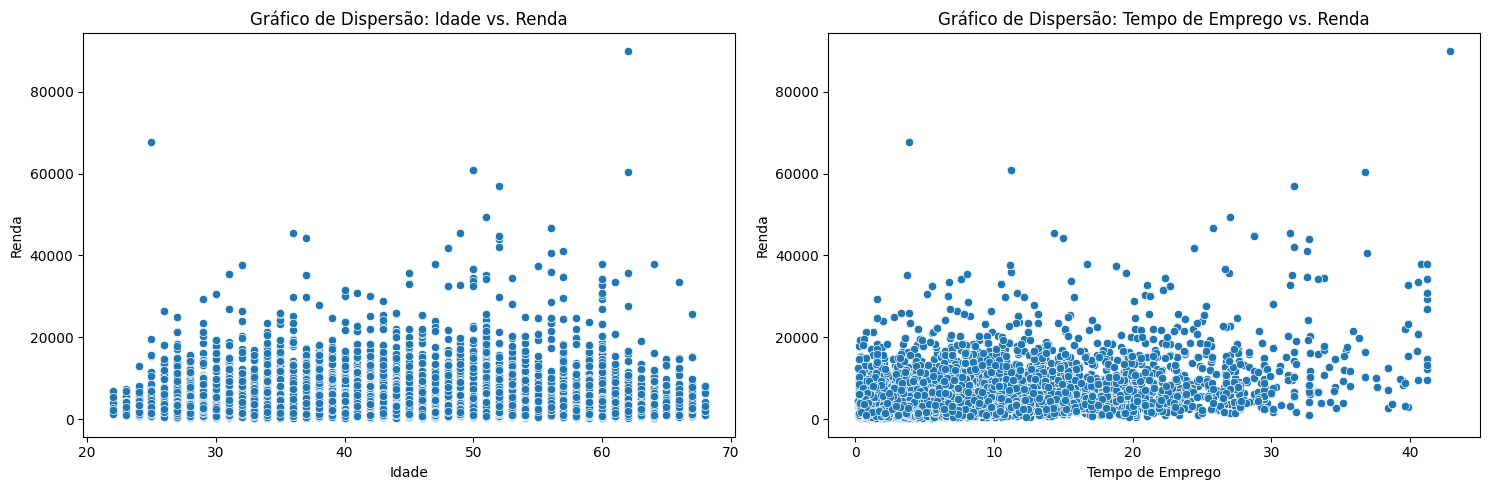

In [7]:
# Criando um gráfico de dispersão para idade vs. renda e tempo de emprego vs renda

# Cria uma figura com dois subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de dispersão: Idade vs. Renda
sns.scatterplot(data=renda_numerico, x='idade', y='renda', ax=axes[0])
axes[0].set_title('Gráfico de Dispersão: Idade vs. Renda')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Renda')

# Gráfico de dispersão: Tempo de Emprego vs. Renda
sns.scatterplot(data=renda_numerico, x='tempo_emprego', y='renda', ax=axes[1])
axes[1].set_title('Gráfico de Dispersão: Tempo de Emprego vs. Renda')
axes[1].set_xlabel('Tempo de Emprego')
axes[1].set_ylabel('Renda')

# Ajuste o espaçamento entre os subplots
plt.tight_layout()

# Exiba o plot
plt.show()

- Podemos perceber uma leve tendência positiva as variáveis idade e tempo de emprego com a variável renda.

3) Na sua opinião, há outliers na variável renda?

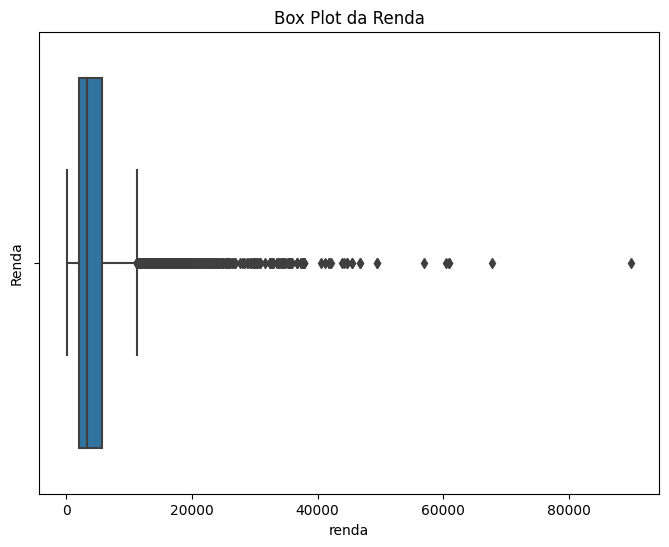

In [8]:
# Criando um box plot da variável renda
plt.figure(figsize=(8, 6))
sns.boxplot(data=renda_numerico, x='renda', orient='h')
plt.title('Box Plot da Renda')
plt.ylabel('Renda')
plt.show()

Sim. Existem outiliers na variável renda.

**4) Calcule o logaritmo da variável renda e repita a sequência de análise**

In [12]:
# Calcule o logaritmo da variável "renda"
renda_numerico.loc[:,'renda_log'] = np.log1p(renda_numerico['renda'])
renda_numerico.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
0,1,36,3.575342,3.0,3369.24,8.122739
1,0,42,0.860274,2.0,6096.14,8.715575
2,2,31,8.065753,4.0,5658.98,8.641176
3,0,50,1.208219,2.0,7246.69,8.888438
4,0,52,13.873973,2.0,4017.37,8.298632


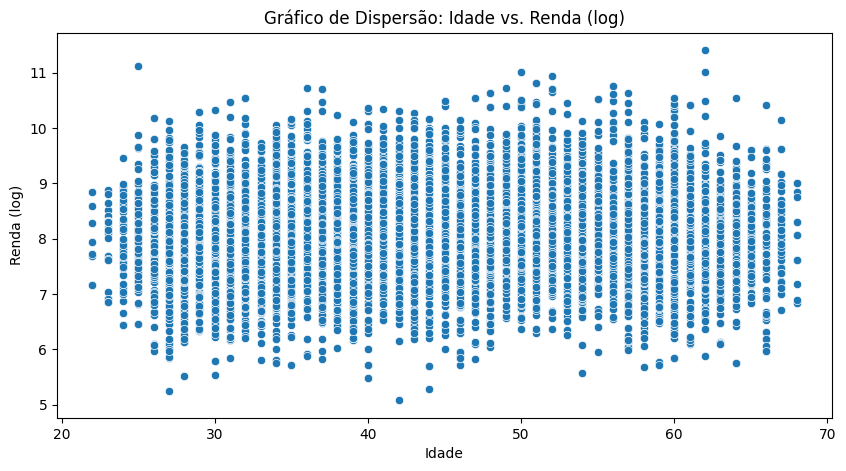

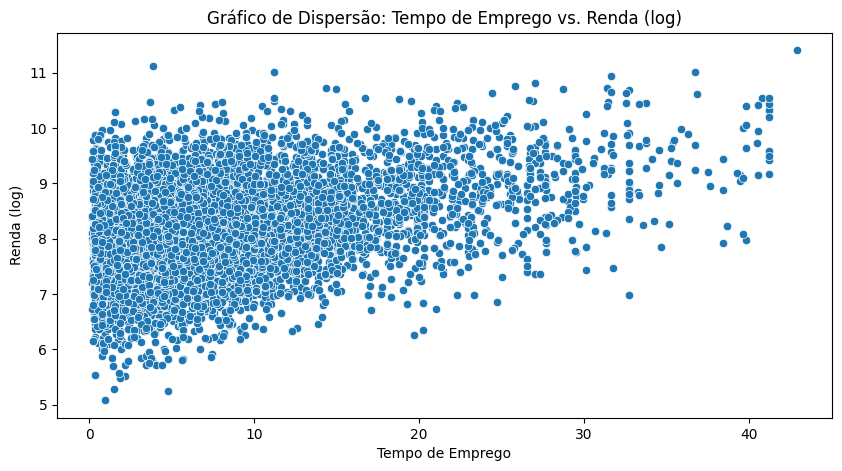

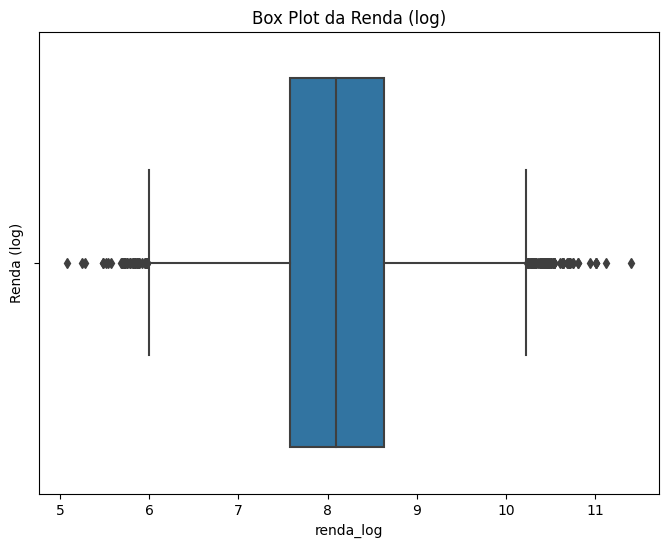

In [10]:
# Cria uma figura com dois subplots (1 linha, 2 colunas)
#fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Cria um gráfico de dispersão para idade vs. renda_log
plt.figure(figsize=(10, 5))
sns.scatterplot(data=renda_numerico, x='idade', y='renda_log')
plt.title('Gráfico de Dispersão: Idade vs. Renda (log)')
plt.xlabel('Idade')
plt.ylabel('Renda (log)')
plt.show()

# Crie um gráfico de dispersão para tempo_emprego vs. renda_log
plt.figure(figsize=(10, 5))
sns.scatterplot(data=renda_numerico, x='tempo_emprego', y='renda_log')
plt.title('Gráfico de Dispersão: Tempo de Emprego vs. Renda (log)')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda (log)')
plt.show()

# Crie um box plot da variável renda_log
plt.figure(figsize=(8, 6))
sns.boxplot(data=renda_numerico, x='renda_log', orient='h')
plt.title('Box Plot da Renda (log)')
plt.ylabel('Renda (log)')
plt.show()

**5) A aplicação do LOG você acha que melhorou ou piorou a análise?**

- Quando observamos idade vs renda, percebemos que a correlação não parece muito clara.
- Quando observamos tempo de emprego vs renda, percebemos que a correlação ficou um pouco mais clara.
- Quando observamos o box plot da renda, percebemos que a distribuição dos outliers foi alterada, incluindo outliers nos dois lados no gráfico
- A aplicação de log pode tanto melhorar quanto piorar a análise dos dados.